In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('cleanData_LocationNum.csv')
df.head(5)

,City,State,Aspergillus flavus/oryzae,Aspergillus fumigatus,Aspergillus niger,Aspergillus ochraceus,Aspergillus penicillioides,Aspergillus restrictus*,Aspergillus sclerotiorum,Aspergillus sydowii,...,Immune_chronicmonoorepstein-barrvirus,Immune_frequentherpesoutbreaks,Immune_viralinfectionsbecomebacterial,Immune_increasedsusceptibilitytocancer,Reproductive_changesinmenstrualcycle,Reproductive_inconsistentmenstrualcycle,Reproductive_vaginalyeastorbacterialinfections,Reproductive_jockitch,Reproductive_infertilityinbothgenders,Reproductive_hormoneimbalances
0,0,0,0,0,14,0,0,11,0,0,...,0,0,0,0,1,1,1,1,1,1
1,1,1,0,0,12,0,5,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,1,0,3,3,234,0,6,0,5,...,1,0,0,0,1,1,0,0,0,1
3,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,64,5,32,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0


Principal Component Analysis(PCA) to reduce the 145 columns

In [2]:
#Inital Shape
df.shape

(553, 144)

In [3]:
#Extracting Symptom columns for Model
brain_symptomDF = df.filter(like='Brain')
brain_symptomDF

,Brain_brainfog,Brain_memoryloss,Brain_anger/aggressiveness,Brain_confusion,Brain_troublefindingtherightword
0,1,0,0,0,0
1,1,1,1,0,0
2,1,1,1,1,1
3,0,0,0,0,0
4,1,0,1,0,1
...,...,...,...,...,...
548,0,0,0,0,0
549,1,0,0,0,0
550,0,0,0,0,0
551,0,0,0,0,0


In [4]:
# Extracting location and mold columns for PCA analysis
location_moldDF = df.loc[:,'City':'Rhizopus stolonifer']
print(location_moldDF.shape)
location_moldDF.columns

(553, 38)


Index(['City', 'State', 'Aspergillus flavus/oryzae', 'Aspergillus fumigatus',
       'Aspergillus niger', 'Aspergillus ochraceus',
       'Aspergillus penicillioides', 'Aspergillus restrictus*',
       'Aspergillus sclerotiorum', 'Aspergillus sydowii', 'Aspergillus unguis',
       'Aspergillus versicolor', 'Aureobasidium pullulans',
       'Chaetomium globosum', 'Cladosporium sphaerospermum',
       'Eurotium (Asp.) amstelodami*', 'Paecilomyces variotii',
       'Penicillium brevicompactum', 'Penicillium corylophilum',
       'Penicillium crustosum*', 'Penicillium purpurogenum',
       'Penicillium spinulosum*', 'Penicillium variabile',
       'Scopulariopsis brevicaulis/fusca', 'Scopulariopsis chartarum',
       'Stachybotrys chartarum', 'Trichoderma viride*', 'Wallemia sebi',
       'Acremonium strictum', 'Alternaria alternata', 'Aspergillus ustus',
       'Cladosporium cladosporioides 1', 'Cladosporium cladosporioides 2',
       'Cladosporium herbarum', 'Epicoccum nigrum', 'Mucor am

In [5]:
# Just mold
moldDF = df.loc[:,'Aspergillus flavus/oryzae':'Rhizopus stolonifer']
print(moldDF.shape)
moldDF.columns

(553, 36)


Index(['Aspergillus flavus/oryzae', 'Aspergillus fumigatus',
       'Aspergillus niger', 'Aspergillus ochraceus',
       'Aspergillus penicillioides', 'Aspergillus restrictus*',
       'Aspergillus sclerotiorum', 'Aspergillus sydowii', 'Aspergillus unguis',
       'Aspergillus versicolor', 'Aureobasidium pullulans',
       'Chaetomium globosum', 'Cladosporium sphaerospermum',
       'Eurotium (Asp.) amstelodami*', 'Paecilomyces variotii',
       'Penicillium brevicompactum', 'Penicillium corylophilum',
       'Penicillium crustosum*', 'Penicillium purpurogenum',
       'Penicillium spinulosum*', 'Penicillium variabile',
       'Scopulariopsis brevicaulis/fusca', 'Scopulariopsis chartarum',
       'Stachybotrys chartarum', 'Trichoderma viride*', 'Wallemia sebi',
       'Acremonium strictum', 'Alternaria alternata', 'Aspergillus ustus',
       'Cladosporium cladosporioides 1', 'Cladosporium cladosporioides 2',
       'Cladosporium herbarum', 'Epicoccum nigrum', 'Mucor amphibiorum*',
    

In [6]:
nan_count = np.sum(location_moldDF.isnull(), axis = 0)
print(nan_count)

City                                0
State                               0
Aspergillus flavus/oryzae           0
Aspergillus fumigatus               0
Aspergillus niger                   0
Aspergillus ochraceus               0
Aspergillus penicillioides          0
Aspergillus restrictus*             0
Aspergillus sclerotiorum            0
Aspergillus sydowii                 0
Aspergillus unguis                  0
Aspergillus versicolor              0
Aureobasidium pullulans             0
Chaetomium globosum                 0
Cladosporium sphaerospermum         0
Eurotium (Asp.) amstelodami*        0
Paecilomyces variotii               0
Penicillium brevicompactum          0
Penicillium corylophilum            0
Penicillium crustosum*              0
Penicillium purpurogenum            0
Penicillium spinulosum*             0
Penicillium variabile               0
Scopulariopsis brevicaulis/fusca    0
Scopulariopsis chartarum            0
Stachybotrys chartarum              0
Trichoderma 

1. Standardaization

In [7]:
# Standardizing the data
scaler = StandardScaler()
data_std = scaler.fit_transform(moldDF)
data_std


array([[-0.1050983 , -0.07485404, -0.34818613, ..., -0.2872521 ,
        -0.14352932, -0.08067786],
       [-0.1050983 , -0.07485404, -0.35016229, ..., -0.24845673,
        -0.11321432, -0.13967921],
       [-0.1050983 , -0.07345257, -0.359055  , ...,  0.16443684,
        -0.12837182, -0.13967921],
       ...,
       [-0.06723553, -0.06737954, -0.05472671, ..., -0.20966136,
         0.06645756, -0.13967921],
       [-0.08238064, -0.07158395, -0.21479548, ..., -0.22351685,
        -0.14685658, -0.1200121 ],
       [-0.1050983 , -0.07345257, -0.28099677, ...,  3.65047784,
        -0.01228752, -0.0708443 ]])

2.Apply PCA

In [8]:
from sklearn.decomposition import PCA

# Choosing the number of components for PCA
pca = PCA(n_components=0.90)  # Retains 90% of the variance
X_pca = pca.fit_transform(data_std)

# Check how many components were selected
print("Number of components chosen:", pca.n_components_)

Number of components chosen: 25


says i need 25 components to capture 90% of the data

In [11]:

locationmoldDF_PCA = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(25)])


3. Examine and Visualize

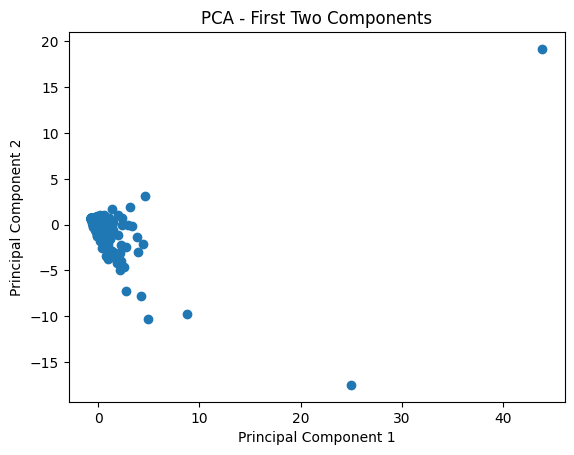

In [12]:
import matplotlib.pyplot as plt
plt.scatter(locationmoldDF_PCA['PC1'], locationmoldDF_PCA['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Components')
plt.show()


Scree Plot

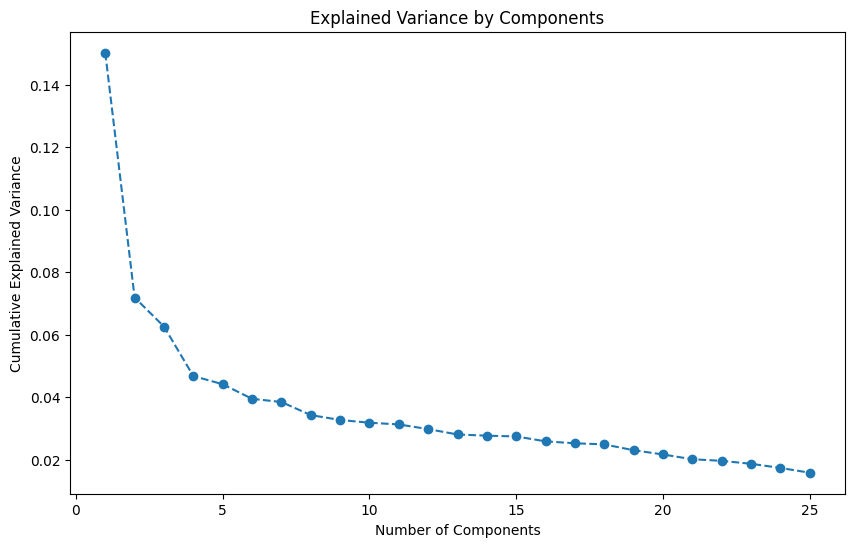

In [14]:
import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, 26), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


Cumulative Explained Variance Plot

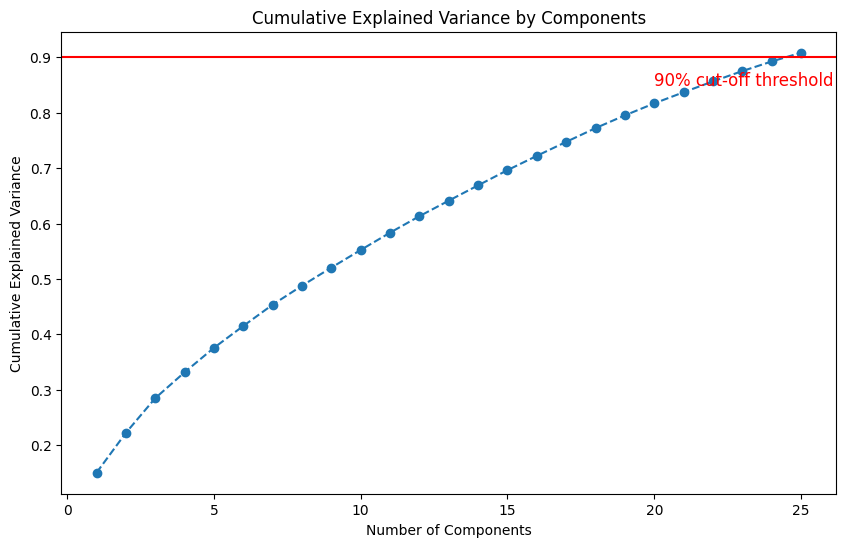

In [16]:
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 26), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='-')  # Line at 90% variance
plt.text(20, 0.85, '90% cut-off threshold', color = 'red', fontsize=12)
plt.show()


Heatmap plot

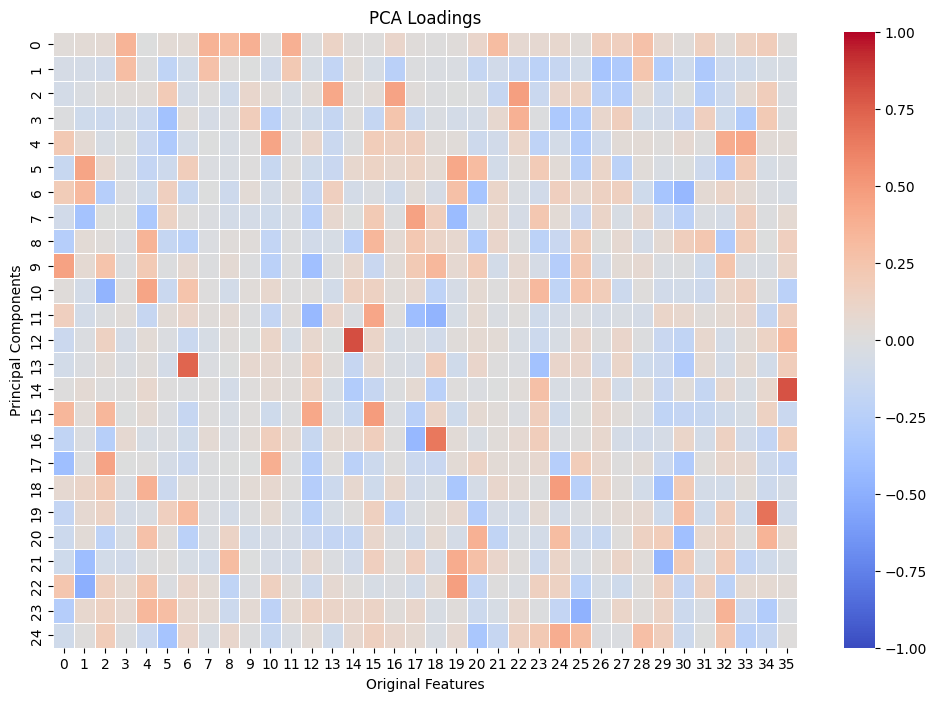

In [17]:
import seaborn as sns

loadings = pca.components_
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=False, cmap='coolwarm',linewidths=0.5, linecolor='white', vmin=-1, vmax=1)
plt.ylabel('Principal Components')
plt.xlabel('Original Features')
plt.title('PCA Loadings')
plt.show()

#hahahaah that chart below does not seem like im going down the right path 

If there is any correlation above 75% get their names. From there we can observe that the two types are always coexisitng in the data. Check how to set threshold for correlation matrix. 

if they are highly correlated, one of them can be dropped. 

Pair Plot

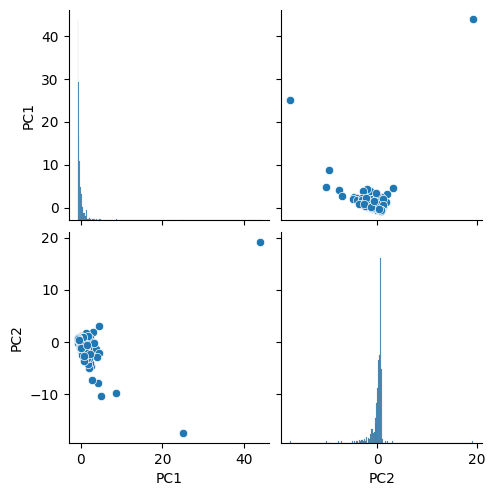

In [19]:
import seaborn as sns

# Selecting first few components for pair plot
pca_pair_df = locationmoldDF_PCA[['PC1', 'PC2']]
sns.pairplot(pca_pair_df)
plt.show()
